# Illustration for report

In [1]:
import os
from pathlib import Path

import datamol as dm
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torchmetrics.functional import pairwise_cosine_similarity

from src.modules.compound_transforms.pna import PNATransform
from src.utils.io import load_image_paths_to_array

In [2]:
for i in range(1, 4):
    if not Path(f"../cpjump{i}/jump/").exists():
        print(f"Mounting cpjump{i}...")
        os.system(f"sshfs bioclust:/projects/cpjump{i}/ ../cpjump{i}")
    else:
        print(f"cpjump{i} already mounted.")

cpjump1 already mounted.
cpjump2 already mounted.
cpjump3 already mounted.


## Molecules

In [14]:
trans = PNATransform("smiles")

In [119]:
smile = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
mol = dm.to_mol(smile)
inchi = dm.to_inchi(mol)
selfies = dm.to_selfies(mol)
smarts = dm.to_smarts(mol)
graph = trans(mol)
adj = graph.adjacency_matrix().to_dense().numpy().astype(int)
nfeats = graph.ndata["feat"].numpy().astype(int)
efeats = graph.edata["feat"].numpy().astype(int)

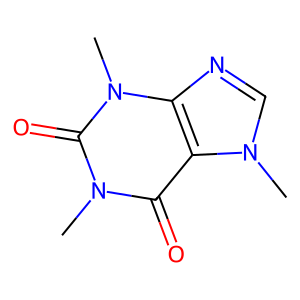

In [120]:
dm.viz.to_image(mol, use_svg=False, outfile="./images/simple_mol1.png")

In [123]:
smiless = [
    "CN1C=NC2=C1C(=O)N(C(=O)N2C)C",
    "CN=C=O",
    "COc(c1)cccc1C#N",
    "[Cu+2].[O-]S(=O)(=O)[O-]",
    "O=Cc1ccc(O)c(OC)c1 COc1cc(C=O)ccc1O",
]

In [124]:
for smiles in smiless:
    mol = dm.to_mol(smiles)
    dm.viz.to_image(mol, use_svg=False, outfile=f"./images/{smiles}.png")

In [67]:
smile = "COc(c1)cccc1C#N"
mol = dm.to_mol(smile)
inchi = dm.to_inchi(mol)
selfies = dm.to_selfies(mol)
smarts = dm.to_smarts(mol)
graph = trans(mol)
adj = graph.adjacency_matrix().to_dense().numpy().astype(int)
nfeats = graph.ndata["feat"].numpy().astype(int)
efeats = graph.edata["feat"].numpy().astype(int)

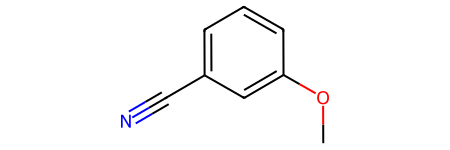

In [90]:
mol

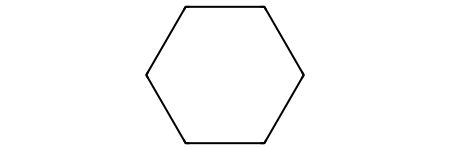

In [97]:
dm.to_mol("C1CCCCC1")

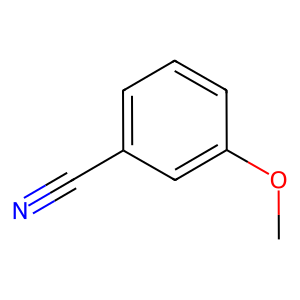

In [110]:
dm.viz.to_image(mol, use_svg=False, outfile="./images/simple_mol.pdf")

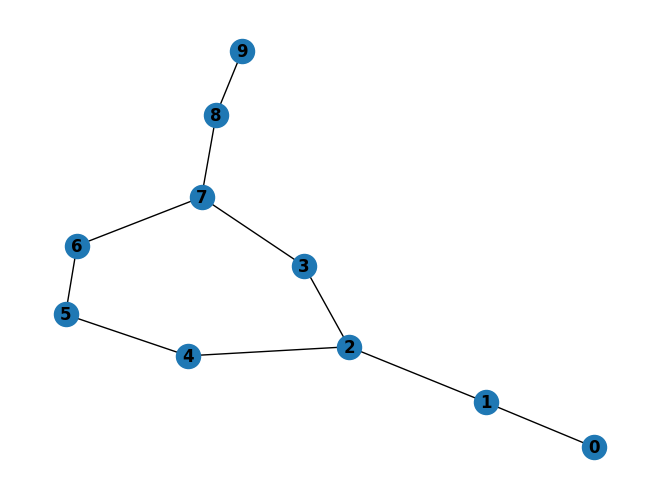

In [83]:
G = dm.to_graph(mol)
nx.draw(G, with_labels=True, font_weight="bold")

In [118]:
pd.DataFrame(adj).to_csv("./images/adj.csv", index=False, header=False)

In [73]:
selfies, smile, inchi, smarts

('[C][O][C][=C][C][=C][C][Branch1][Ring1][C][#N][=C][Ring1][Branch2]',
 'COc(c1)cccc1C#N',
 'InChI=1S/C8H7NO/c1-10-8-4-2-3-7(5-8)6-9/h2-5H,1H3',
 '[#6]-[#8]-[#6]1:[#6]:[#6](:[#6]:[#6]:[#6]:1)-[#6]#[#7]')

In [2]:
pdist = nn.PairwiseDistance(p=2)
input1 = torch.randn(100, 128)
input2 = torch.randn(100, 128)
output = pdist(input1, input2)

In [6]:
pairwise_cosine_similarity(input1, input2)

tensor([[ 0.0443,  0.0486,  0.0588,  ...,  0.0199, -0.0699, -0.2329],
        [-0.1026,  0.2526, -0.1167,  ...,  0.0619, -0.1334,  0.0745],
        [ 0.1473,  0.0062, -0.1182,  ..., -0.0099,  0.0136, -0.0080],
        ...,
        [ 0.0181, -0.0708, -0.0487,  ..., -0.0142,  0.0257,  0.0264],
        [ 0.0104, -0.1124, -0.0534,  ..., -0.1524, -0.0526,  0.0307],
        [ 0.0169, -0.0235, -0.0051,  ..., -0.0487,  0.1530, -0.1144]])

In [11]:
torch.cdist(input1, input2)

tensor([[14.7545, 14.4521, 14.6172,  ..., 15.8993, 15.4566, 16.5075],
        [16.7507, 13.5800, 16.8317,  ..., 16.3400, 16.8312, 15.1467],
        [14.0234, 14.8654, 16.0314,  ..., 16.2247, 14.9349, 15.0219],
        ...,
        [15.6920, 16.1122, 16.1907,  ..., 16.8768, 15.4908, 15.4137],
        [16.1336, 16.8270, 16.6188,  ..., 18.3781, 16.4935, 15.7627],
        [15.1744, 15.2081, 15.3180,  ..., 16.6453, 13.9495, 15.9214]])

## IDR overexpression

In [3]:
idr_meta = pd.read_csv("../cpjump1/idr0033-rohban-pathways/processed_metadata.csv")

In [4]:
img_dir = "../cpjump1/screen_1751"

In [7]:
idr_meta

,plate,well,field,image_id,Gene Symbol,ORF Identifier,FileName_DNA,FileName_ER,FileName_RNA,FileName_AGP,FileName_Mito
0,41744,1312494,0,3191565,BRCA1,ccsbBroad304_00173,screen_1751_3191565_0.png,screen_1751_3191565_1.png,screen_1751_3191565_2.png,screen_1751_3191565_3.png,screen_1751_3191565_4.png
1,41744,1312494,1,3191566,BRCA1,ccsbBroad304_00173,screen_1751_3191566_0.png,screen_1751_3191566_1.png,screen_1751_3191566_2.png,screen_1751_3191566_3.png,screen_1751_3191566_4.png
2,41744,1312494,2,3191567,BRCA1,ccsbBroad304_00173,screen_1751_3191567_0.png,screen_1751_3191567_1.png,screen_1751_3191567_2.png,screen_1751_3191567_3.png,screen_1751_3191567_4.png
3,41744,1312494,3,3191568,BRCA1,ccsbBroad304_00173,screen_1751_3191568_0.png,screen_1751_3191568_1.png,screen_1751_3191568_2.png,screen_1751_3191568_3.png,screen_1751_3191568_4.png
4,41744,1312494,4,3191569,BRCA1,ccsbBroad304_00173,screen_1751_3191569_0.png,screen_1751_3191569_1.png,screen_1751_3191569_2.png,screen_1751_3191569_3.png,screen_1751_3191569_4.png
...,...,...,...,...,...,...,...,...,...,...,...
458,41757,1315039,1,3227407,STAT3,BRDN0000464969,screen_1751_3227407_0.png,screen_1751_3227407_1.png,screen_1751_3227407_2.png,screen_1751_3227407_3.png,screen_1751_3227407_4.png
459,41757,1315039,2,3227408,STAT3,BRDN0000464969,screen_1751_3227408_0.png,screen_1751_3227408_1.png,screen_1751_3227408_2.png,screen_1751_3227408_3.png,screen_1751_3227408_4.png
460,41757,1315039,4,3227410,STAT3,BRDN0000464969,screen_1751_3227410_0.png,screen_1751_3227410_1.png,screen_1751_3227410_2.png,screen_1751_3227410_3.png,screen_1751_3227410_4.png
461,41757,1315039,6,3227412,STAT3,BRDN0000464969,screen_1751_3227412_0.png,screen_1751_3227412_1.png,screen_1751_3227412_2.png,screen_1751_3227412_3.png,screen_1751_3227412_4.png


In [29]:
ex = idr_meta.iloc[420]
imgs_paths = [str(Path(img_dir) / ex[f"FileName_{i}"]) for i in ["DNA", "ER", "Mito", "AGP", "ER"]]

In [30]:
ar = load_image_paths_to_array(imgs_paths)

In [31]:
ar.shape

(5, 1080, 1080)

In [32]:
rgb_ar = ar[:3, :, :]

(-0.5, 1079.5, 1079.5, -0.5)

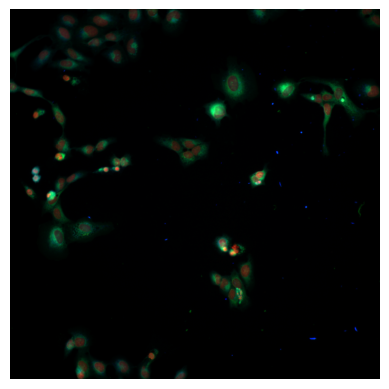

In [33]:
plt.imshow(rgb_ar.transpose(1, 2, 0))
plt.axis("off")

In [34]:
smiless = [
    "CN1C=NC2=C1C(=O)N(C(=O)N2C)C",
    "CN=C=O",
    "COc(c1)cccc1C#N",
    "[Cu+2].[O-]S(=O)(=O)[O-]",
    "O=Cc1ccc(O)c(OC)c1 COc1cc(C=O)ccc1O",
]

In [ ]:
smiles